In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### StandardScaler
* Different Features can be in differnt scale
* We need to bring all features to the same scale

In [2]:
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [3]:
np.mean(df.x1)

-0.0036286430710210575

In [4]:
np.std(df.x1)

1.9790234887162363

In [5]:
(df.x1 - np.mean(df.x1))/np.std(df.x1)

0      -0.439705
1      -0.013708
2       0.556147
3       0.599325
4      -0.700217
5       1.110470
6       1.085638
7       0.702014
8      -1.128036
9      -0.288949
10      0.192966
11      0.060367
12      1.005737
13     -0.328484
14     -1.343599
15      0.118347
16      0.301758
17      0.219094
18     -0.526359
19      0.503280
20      0.141852
21      0.223394
22      0.348738
23      0.999124
24      0.169892
25     -0.645361
26      0.570432
27      0.229006
28     -1.515063
29     -0.455850
          ...   
9970   -0.220561
9971   -0.440041
9972   -1.183129
9973    1.213121
9974   -1.058895
9975    0.007536
9976    0.070106
9977   -1.835771
9978    0.667695
9979    0.028643
9980   -0.135528
9981   -1.233923
9982   -1.719884
9983   -0.411773
9984    0.329693
9985    0.556031
9986    0.419355
9987   -1.467225
9988    0.025934
9989    0.468612
9990    0.640426
9991    0.420544
9992    0.109961
9993    1.895325
9994    0.441671
9995   -0.237098
9996    1.821732
9997   -0.2451

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
ss.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
ss.mean_

array([-3.62864307e-03,  4.96008392e+00, -5.00088142e+00])

In [9]:
np.sqrt(ss.var_)

array([1.97902349, 3.02621338, 4.98679894])

In [10]:
res = ss.transform(df)

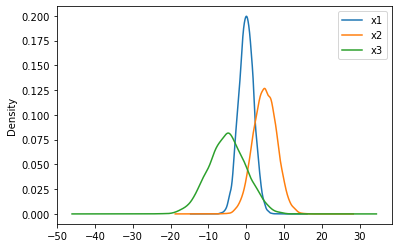

In [11]:
df.plot.kde()

In [12]:
df_tf = pd.DataFrame(res)

In [13]:
df_tf.columns = ['X1','X2','X3']

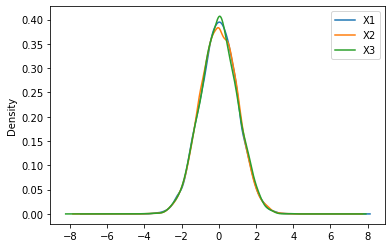

In [14]:
df_tf.plot.kde()

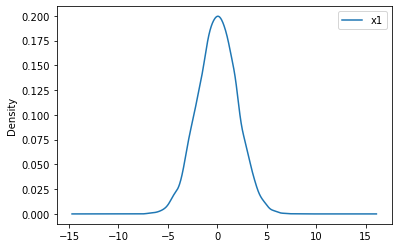

In [15]:
df[['x1']].plot.kde()

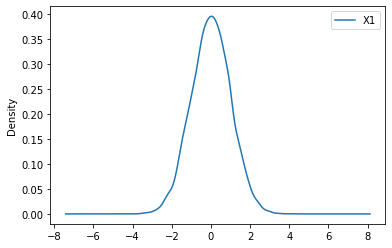

In [16]:
df_tf[['X1']].plot.kde()

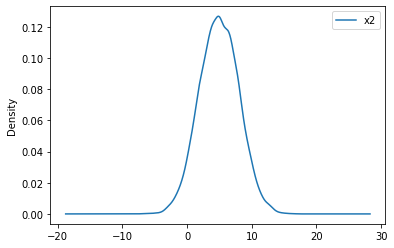

In [17]:
df[['x2']].plot.kde()

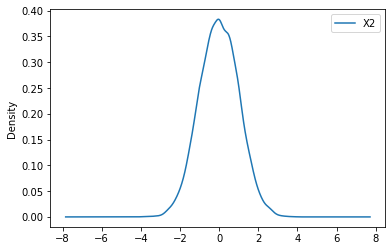

In [19]:
df_tf[['X2']].plot.kde()

* For Many ML algorithms, the value of data don't matter as much as the relationship between values
* Standard Scaler is Good for normally distributed data

### MinMaxScaler
* Suited when Data is not normally distributed

In [20]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

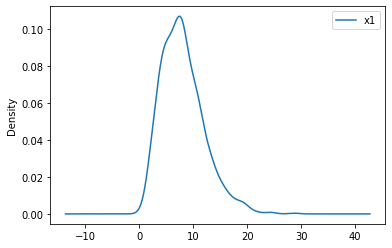

In [21]:
df[['x1']].plot.kde()

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mm = MinMaxScaler()

In [24]:
mm.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
mm.min_

array([-0.01651686, -0.59485037, -1.90633378])

In [26]:
mm.data_max_

array([28.63369966, 39.68840648, 60.74790417])

In [27]:
mm.data_min_

array([ 0.46525415, 14.80305845, 39.84600207])

In [28]:
mm.data_range_

array([28.1684455 , 24.88534802, 20.9019021 ])

In [29]:
res = mm.transform(df)

In [30]:
df_tf = pd.DataFrame(res)
df_tf.columns = ['X1','X2','X3']

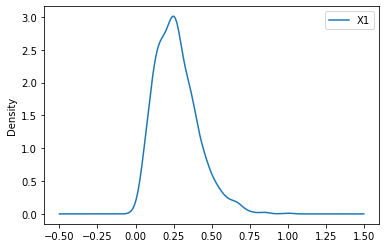

In [31]:
df_tf[['X1']].plot.kde()

In [32]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [33]:
house_data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

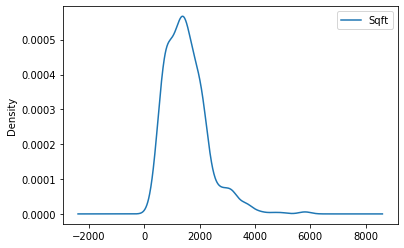

In [34]:
house_data[['Sqft']].plot.kde()

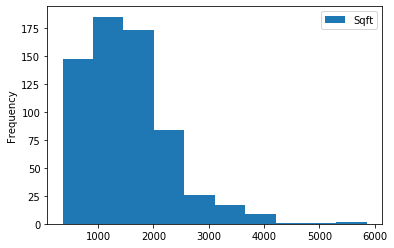

In [35]:
house_data[['Sqft']].plot.hist()

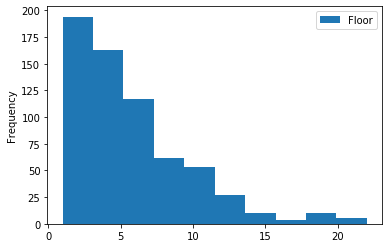

In [36]:
house_data[['Floor']].plot.hist()

#### Important Interview Question :How to check if data is normally distributed
* Graphical Methods Like Histogram or Kde or QQPlot (suggested read)
* Statical Test - Shapiro-Wilk Test, K^2 Test, AD Test (additional read)

### RobustScaler
* Earlier Scaling Methods are impacted by Outliers
* Robustcaler takes care of outliers

### Normalizer

In [38]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

In [39]:
np.sqrt(np.sum(np.square(df),axis=1))

0      136.532048
1      160.368326
2      116.038787
3      120.863559
4      162.791277
5       83.150466
6      125.195847
7       72.807967
8      147.227715
9      129.745906
10      93.813645
11      96.566040
12      15.937377
13     135.432640
14     161.496130
15     133.914152
16     176.093725
17     161.288561
18     115.784282
19      58.881236
20     125.952372
21      49.081565
22     140.939703
23      39.000000
24     101.828287
25      54.817880
26      84.314886
27     104.752088
28     119.553335
29     107.508139
          ...    
970    136.517398
971     87.229582
972    114.057003
973    115.191145
974    118.363846
975    126.617534
976    177.842627
977    149.335193
978    152.029602
979    138.311243
980    119.071407
981    114.008772
982     84.870490
983     62.872888
984    153.137193
985    144.526814
986    142.024646
987    121.729208
988     67.896981
989    140.406553
990     99.654403
991     67.542579
992    100.044990
993    120.399336
994    113

In [40]:
df[:4]

,x1,y1,z1
0,-57.0,44.0,-116.0
1,74.0,19.0,-141.0
2,46.0,18.0,105.0
3,-96.0,64.0,-36.0


In [41]:
from sklearn.preprocessing import Normalizer

In [42]:
nn = Normalizer()

In [43]:
nn.fit(df)

Normalizer(copy=True, norm='l2')

In [44]:
res = nn.transform(df)

In [45]:
res[:5]

array([[-0.4174844 ,  0.32226866, -0.84961738],
       [ 0.46143775,  0.11847726, -0.87922599],
       [ 0.39641917,  0.15512055,  0.90486985],
       [-0.79428407,  0.52952271, -0.29785653],
       [-0.58356935, -0.24571341,  0.77399724]])

In [47]:
df[:1]/136.532048

,x1,y1,z1
0,-0.417484,0.322269,-0.849617


In [48]:
df_tf = pd.DataFrame(res)

In [49]:
df_tf.columns = ['x1','x2','x3']

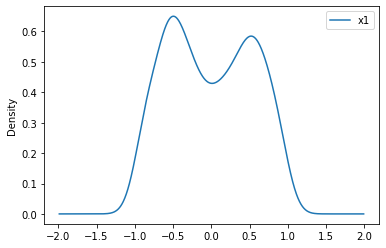

In [50]:
df_tf[['x1']].plot.kde()

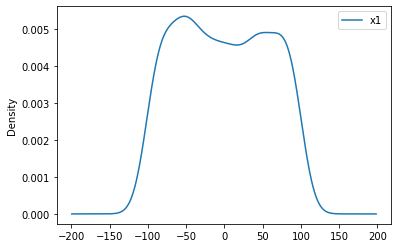

In [51]:
df[['x1']].plot.kde()

### Interview Question
* When to use scaling & when to use Normalization

### Binerization Technique
* Binning data into buckets

### Dealing with Nominal & Ordinal Data
* LabelEncoder - Takes col, Returns encoded
* LabelBinerizer - Takes col, Returns onehot
* OneHotEncoder - Takes mul cols, Returns onehot
* OrdinalEncoder - Takes mul cols, Returns encoded

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [55]:
le.fit(df.Income)

LabelEncoder()

In [56]:
le.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [57]:
le.transform(df.Income)

array([1, 1, 0, 2, 2, 0])

* LabelEncoder works on a column

In [58]:
from sklearn.preprocessing import LabelBinarizer

In [59]:
lb = LabelBinarizer()

In [60]:
lb.fit(df.Income)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [61]:
lb.transform(df.Income)

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [62]:
lb.classes_

array(['High', 'Low', 'Medium'], dtype='<U6')

* LabelBinerizer also works on a column

In [65]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High'],
    'Location':['Delhi','Mumbai','Bangalore','Kolkata','Chennai','Mumbai']})

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
ohe = OneHotEncoder()

In [68]:
ohe.fit(df[['Income','Location']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [69]:
ohe.categories_

[array(['High', 'Low', 'Medium'], dtype=object),
 array(['Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)]

In [70]:
ohe.transform(df[['Income','Location']])

<6x8 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [71]:
ohe.transform(df[['Income','Location']]).toarray()

array([[0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1.]])

* OneHotEncoder converts data into one hot information & takes multiple columns as input

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
ode = OrdinalEncoder()

In [74]:
ode.fit(df[['Income','Location']])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [75]:
ode.transform(df[['Income','Location']])

array([[1., 2.],
       [1., 4.],
       [0., 0.],
       [2., 3.],
       [2., 1.],
       [0., 4.]])

### Interview Alert
* When to use One Hot Encoding - If there is no order in the data column like gender
    - OHE will increase the number of columns & thus data sizes
* When to use Label Encoding - If there is order in the data use label encoding like low medium high
* As we learn more about estimators, we will realize usage of these preprocessors

## Data Preprocessing for Text (Basics)
* Bag Of Words Methods

    * CountVectorizer
    * TfIdfVectorizer
    * HashingVectorizer
* NLTK Package for Stemming & Lemmetization

    * Understanding Packacge
    * Stemming
    * Lemmetization

In [76]:
import pandas as pd

In [77]:
df = pd.DataFrame({'Text':[
    'Hello How are you',
    'Great stuff buddy',
    'How are things',
    'Awesome stuff Awesome'
],'Info':[11,22,44,21]})

In [78]:
df

,Text,Info
0,Hello How are you,11
1,Great stuff buddy,22
2,How are things,44
3,Awesome stuff Awesome,21


### Points to understand
* Text Data cannot be used in ML models
* They needs to be converted into vectors

### CountVectorizer
* Each word is assigned a column
* Value in the column represents the count of that work in the text row known as document
* Each row is known as document.
* Combination of these documents is known as corpus

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
cv = CountVectorizer()

In [81]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [82]:
cv.vocabulary_

{'hello': 4,
 'how': 5,
 'are': 0,
 'you': 8,
 'great': 3,
 'stuff': 6,
 'buddy': 2,
 'things': 7,
 'awesome': 1}

In [83]:
res = cv.transform(df.Text).toarray()

In [84]:
cols = list(map(lambda x:x[0] ,sorted(list(cv.vocabulary_.items()),key=lambda e:e[1])))

In [86]:
map_df = pd.DataFrame(res)
map_df.columns = cols

In [87]:
map_df

,are,awesome,buddy,great,hello,how,stuff,things,you
0,1,0,0,0,1,1,0,0,1
1,0,0,1,1,0,0,1,0,0
2,1,0,0,0,0,1,0,1,0
3,0,2,0,0,0,0,1,0,0


In [88]:
cv.transform(['you are great']).toarray()

array([[1, 0, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [89]:
cv.transform(['you are great coder']).toarray()

array([[1, 0, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [90]:
map_df['Info'] = df.Info

In [91]:
map_df

,are,awesome,buddy,great,hello,how,stuff,things,you,Info
0,1,0,0,0,1,1,0,0,1,11
1,0,0,1,1,0,0,1,0,0,22
2,1,0,0,0,0,1,0,1,0,44
3,0,2,0,0,0,0,1,0,0,21


In [92]:
cv = CountVectorizer(stop_words=['are'])

In [93]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=['are'],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [94]:
cv.vocabulary_

{'hello': 3,
 'how': 4,
 'you': 7,
 'great': 2,
 'stuff': 5,
 'buddy': 1,
 'things': 6,
 'awesome': 0}

* At very high dimension (number of features), estimators/algorithms don't work well
* Number of possibility of words increases dimension of data
* stop_words reduces the dimension
* stop_words = 'english', automaticcaly
* Another technique is vocabolary

In [95]:
cv = CountVectorizer(stop_words='english')

In [96]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [97]:
cv.vocabulary_

{'hello': 3, 'great': 2, 'stuff': 4, 'buddy': 1, 'things': 5, 'awesome': 0}

In [98]:
cv.transform(df.Text).toarray()

array([[0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 1, 0]], dtype=int64)

In [99]:
cv = CountVectorizer(vocabulary=['great','buddy','awesome'])

In [100]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=['great', 'buddy', 'awesome'])

In [101]:
cv.vocabulary_

{'great': 0, 'buddy': 1, 'awesome': 2}

In [102]:
cv.transform(df.Text).toarray()

array([[0, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 2]], dtype=int64)

* Sometimes combination of words are important than singlar words

In [103]:
cv = CountVectorizer(ngram_range=[1,2], stop_words='english')

In [104]:
cv.fit(df.Text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=[1, 2], preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [105]:
cv.vocabulary_

{'hello': 5,
 'great': 3,
 'stuff': 6,
 'buddy': 2,
 'great stuff': 4,
 'stuff buddy': 8,
 'things': 9,
 'awesome': 0,
 'awesome stuff': 1,
 'stuff awesome': 7}

In [106]:
cv.transform(df.Text).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [2, 1, 0, 0, 0, 0, 1, 1, 0, 0]], dtype=int64)

### TF-IDF Vectorizer
* It is a measure of originality of a word by comparing the number of times a word appears in doc with the number of times the word appears in a corpus.
* Let's assume you have 1000 docs(each text) in the corpus(contains all the docs).
* Words like 'is','the','are' appears in all the docs.
* Words like 'nuclear','prime-minister' appears only in few docs but multiple times.
* TF-IDF = TF(t,d) * IDF(t)
* IDF(t) = log(1+no. of doc / 1 + df(d,t) +1)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
tfidf = TfidfVectorizer(stop_words='english')

In [109]:
tfidf.fit(df.Text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [110]:
import numpy as np
np.round(tfidf.transform(df.Text).toarray(),2)

array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.62, 0.62, 0.  , 0.49, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.93, 0.  , 0.  , 0.  , 0.37, 0.  ]])

In [111]:
tfidf.vocabulary_

{'hello': 3, 'great': 2, 'stuff': 4, 'buddy': 1, 'things': 5, 'awesome': 0}

### Hashing Vectorizer
* The above two approaches builds feature with high dimension
* Using HashingVectorizer you can restrict the number of dimensions
* Useful when the data is of very high dimension

In [112]:
from sklearn.feature_extraction.text import HashingVectorizer

In [113]:
hv = HashingVectorizer(n_features=4)

In [114]:
hv.fit(df.Text)

HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
                  decode_error='strict', dtype=<class 'numpy.float64'>,
                  encoding='utf-8', input='content', lowercase=True,
                  n_features=4, ngram_range=(1, 1), norm='l2',
                  preprocessor=None, stop_words=None, strip_accents=None,
                  token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None)

In [115]:
hv.transform(df.Text).toarray()

array([[ 0.81649658, -0.40824829,  0.        ,  0.40824829],
       [ 0.57735027, -0.57735027,  0.57735027,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.4472136 ,  0.        ,  0.89442719]])

# Text Preprocessing using NLTK

### Topic for today's discussion
* Understanding NLTK
* Tokenizing
* Stop-words
* Stemming
* Lemmetizing

<hr>

* Text cannot be processed by ML algos
* They needs to be pre-processed
* They needs to be feature reduction
* NLTK is a very foundation which provides all these things

In [2]:
import nltk  # nltk stands for Natural Language Toolkit, it is a python program to work with human language data

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Tokenization

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize  # sent_tokenize is sentence tokenizer, word_tokenize is word tokenizer

In [4]:
my_txt = "Hello Mr. Learners, how is learning going on? Hope things are fine. Hope the lockdown solves all the issues."

In [5]:
sent_tokenize(my_txt)

['Hello Mr. Learners, how is learning going on?',
 'Hope things are fine.',
 'Hope the lockdown solves all the issues.']

In [6]:
word_tokenize(my_txt)

['Hello',
 'Mr.',
 'Learners',
 ',',
 'how',
 'is',
 'learning',
 'going',
 'on',
 '?',
 'Hope',
 'things',
 'are',
 'fine',
 '.',
 'Hope',
 'the',
 'lockdown',
 'solves',
 'all',
 'the',
 'issues',
 '.']

### Stemming
* Many variations of words carry the same meaning, other than when tense is involved.
* Objective is reduce the dimension of data
* Curse of dimension - lot of algorithms don't work that well if the dimensions is too many

In [7]:
from nltk.stem import PorterStemmer

In [8]:
ps = PorterStemmer()

In [9]:
words = ['runs','runner','running','run']

In [10]:
for word in words:
    print(ps.stem(word))

run
runner
run
run


In [11]:
text_data = ['I runs verying is fast','I was very running fast veries veried']

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame({'Text':text_data})

In [14]:
df

,Text
0,I runs verying is fast
1,I was very running fast veries veried


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
cv = CountVectorizer()

In [17]:
def f(r):
    words = word_tokenize(r)
    res = []
    for word in words:
        res.append(ps.stem(word))
    return (' '.join(res))
df.Text = df.Text.map(f)

In [18]:
df.Text

0              I run veri is fast
1    I wa veri run fast veri veri
Name: Text, dtype: object

In [19]:
cv.fit_transform(df.Text)

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [20]:
cv.vocabulary_

{'run': 2, 'veri': 3, 'is': 1, 'fast': 0, 'wa': 4}

In [21]:
cv.fit_transform(df.Text).toarray()

array([[1, 1, 1, 1, 0],
       [1, 0, 1, 3, 1]], dtype=int64)

### Lemmatizing
* Similar to Stemming
* Stemming can work for incorrect words
* Lemmatizing works on the actual words

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
wl = WordNetLemmatizer()

In [24]:
wl.lemmatize('cats')

'cat'

In [25]:
wl.lemmatize('runs')

'run'

In [26]:
wl.lemmatize('goose')

'goose'

In [27]:
wl.lemmatize('geese')

'goose'

In [28]:
wl.lemmatize('better',pos="a")

'good'

In [29]:
wl.lemmatize('good',pos="a")

'good'

In [30]:
ps.stem('paying')

'pay'

In [31]:
ps.stem('pays')

'pay'

In [32]:
ps.stem('payed')

'pay'

In [33]:
from nltk.stem import LancasterStemmer

In [34]:
ls = LancasterStemmer()

In [35]:
ls.stem('trouble')

'troubl'

In [36]:
ls.stem('troubling')

'troubl'

In [37]:
text = 'He was running and eating at the, same time. He also has a very bad habbit of playing in the Sun after having food?'

In [38]:
punctuations = ',.?'

In [39]:
text = text.replace(',','').replace('?','').replace('.','')

In [40]:
words = word_tokenize(text)

In [41]:
words

['He',
 'was',
 'running',
 'and',
 'eating',
 'at',
 'the',
 'same',
 'time',
 'He',
 'also',
 'has',
 'a',
 'very',
 'bad',
 'habbit',
 'of',
 'playing',
 'in',
 'the',
 'Sun',
 'after',
 'having',
 'food']

In [42]:
for word in words:
    print(wl.lemmatize(word,pos='v'))

He
be
run
and
eat
at
the
same
time
He
also
have
a
very
bad
habbit
of
play
in
the
Sun
after
have
food


In [43]:
horror_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/horror-train.csv')

In [44]:
horror_data.columns

Index(['id', 'text', 'author'], dtype='object')

In [45]:
horror_data = horror_data[['text']]

In [46]:
horror_data[:5]

,text
0,"This process, however, afforded me no means of..."
1,It never once occurred to me that the fumbling...
2,"In his left hand was a gold snuff box, from wh..."
3,How lovely is spring As we looked from Windsor...
4,"Finding nothing else, not even gold, the Super..."


* Using NearestNeighbours with metrices as cosine distance, we will find similar texts
* We can use regex to remove punchuations

In [47]:
def f(t):
    return t.replace(',','').replace('?','').replace('.','')
horror_data['new_text'] =horror_data.text.map(f)

In [49]:
horror_data.head()

,text,new_text
0,"This process, however, afforded me no means of...",This process however afforded me no means of a...
1,It never once occurred to me that the fumbling...,It never once occurred to me that the fumbling...
2,"In his left hand was a gold snuff box, from wh...",In his left hand was a gold snuff box from whi...
3,How lovely is spring As we looked from Windsor...,How lovely is spring As we looked from Windsor...
4,"Finding nothing else, not even gold, the Super...",Finding nothing else not even gold the Superin...


In [50]:
def stem_func(r):
    words = word_tokenize(r)
    sent = []
    for word in words:
        sent.append(ps.stem(word))
    return ' '.join(sent)

horror_data['stem_words'] = horror_data.new_text.map(stem_func)

In [51]:
cv = CountVectorizer(stop_words='english')

In [52]:
cv.fit(horror_data.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [53]:
len(cv.vocabulary_)

24764

In [54]:
cv.fit(horror_data.stem_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [55]:
out = cv.transform(horror_data.stem_words)

In [56]:
len(cv.vocabulary_)

15355

In [57]:
from sklearn.neighbors import NearestNeighbors

In [58]:
nn = NearestNeighbors(metric='cosine')

In [59]:
nn.fit(out)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [60]:
nn.kneighbors(out[4:5])

(array([[1.11022302e-16, 4.57917835e-01, 4.79516561e-01, 4.96637990e-01,
         4.98449609e-01]]),
 array([[    4, 15457,  7409, 18122, 13440]], dtype=int64))

In [61]:
horror_data[:1].text[0]

'This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.'

In [62]:
horror_data.loc[4].text

'Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.'

In [63]:
horror_data.loc[15457].text

'His countenance was rough but intelligent his ample brow and quick grey eyes seemed to look out, over his own plans, and the opposition of his enemies.'

In [64]:
horror_data.loc[18122].text

'The smile of triumph shone on his countenance; determined to pursue his object to the uttermost, his manner and expression seem ominous of the accomplishment of his wishes.'

In [65]:
horror_data.loc[18122]

text          The smile of triumph shone on his countenance;...
new_text      The smile of triumph shone on his countenance;...
stem_words    the smile of triumph shone on hi counten ; det...
Name: 18122, dtype: object

In [66]:
horror_data.loc[15457]

text          His countenance was rough but intelligent his ...
new_text      His countenance was rough but intelligent his ...
stem_words    hi counten wa rough but intellig hi ampl brow ...
Name: 15457, dtype: object

In [67]:
horror_data.loc[4]

text          Finding nothing else, not even gold, the Super...
new_text      Finding nothing else not even gold the Superin...
stem_words    find noth els not even gold the superintend ab...
Name: 4, dtype: object